In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [3]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTGAN/dataset/train_category_1.csv"
data = pd.read_csv(data_path, low_memory=False)

In [4]:
data.columns

Index(['last_fico_range_high', 'annual_inc', 'dti', 'mo_sin_old_rev_tl_op',
       'revol_util', 'int_rate', 'installment', 'avg_cur_bal', 'revol_bal',
       'debt_settlement_flag', 'sub_grade', 'home_ownership', 'purpose',
       'grade', 'total_pymnt', 'total_pymnt_inv', 'funded_amnt', 'loan_amnt',
       'credit_history_years', 'term_months', 'loan_status'],
      dtype='object')

In [5]:
for col in data.columns:
    print(f"{col} features :\n{data[col].unique()}\n")

last_fico_range_high features :
[604. 559. 499. 664. 649. 544. 549. 529. 569. 594. 579. 599. 589. 709.
 539. 619. 629. 564. 534. 654. 674. 519. 524. 614. 644. 609. 514. 634.
 554. 639. 699. 574. 509. 659. 584. 504. 684. 694. 624. 669. 714. 679.
 719. 689. 724. 704. 764. 784. 779. 734. 749. 729. 789. 774. 794. 809.
 829. 739. 754. 819. 814. 834. 799. 744. 759. 804. 850.   0. 769. 824.
 844. 839.]

annual_inc features :
[67500. 46000. 85000. ... 54078. 58596. 75388.]

dti features :
[ 15.81  13.75  19.41 ...  56.6  131.58  54.48]

mo_sin_old_rev_tl_op features :
[206.         315.         161.         103.         189.
 186.         159.         167.         268.         102.
 239.          50.         221.         519.         220.
  66.         131.         190.          77.         129.
 357.         125.         136.         188.         423.
 270.         138.         191.          80.         297.
 119.         113.         108.         107.         201.
 178.         216.         

In [10]:
categorical_features = data.select_dtypes(include=["category", "object"]).columns.tolist()

categorical_features

['debt_settlement_flag', 'sub_grade', 'home_ownership', 'purpose', 'grade']

In [9]:
"""
#dept_settlement_flag : 채무 조정을 했는 지, (y,n)
#sub_grade : 등급 세분화 -> labelEncoding 하는 것도 나쁘지 않다.
#term : 대출 상환기간 (36, 60) -> 이미 int형으로 변환
#purpose : 대출 목적 어떤 목적으로 하는 지.
#home_ownership : 자가 소유상태
"""

'\n#dept_settlement_flag : 채무 조정을 했는 지, (y,n)\n#sub_grade : 등급 세분화 -> labelEncoding 하는 것도 나쁘지 않다.\n#term : 대출 상환기간 (36, 60) -> 이미 int형으로 변환\n#purpose : 대출 목적 어떤 목적으로 하는 지.\n#home_ownership : 자가 소유상태\n'

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217789 entries, 0 to 217788
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   last_fico_range_high  217789 non-null  float64
 1   annual_inc            217789 non-null  float64
 2   dti                   217789 non-null  float64
 3   mo_sin_old_rev_tl_op  217789 non-null  float64
 4   revol_util            217789 non-null  float64
 5   int_rate              217789 non-null  float64
 6   installment           217789 non-null  float64
 7   avg_cur_bal           217789 non-null  float64
 8   revol_bal             217789 non-null  float64
 9   debt_settlement_flag  217789 non-null  object 
 10  sub_grade             217789 non-null  object 
 11  home_ownership        217789 non-null  object 
 12  purpose               217789 non-null  object 
 13  grade                 217789 non-null  object 
 14  total_pymnt           217789 non-null  float64
 15  

## Continuous data log변환 필요시

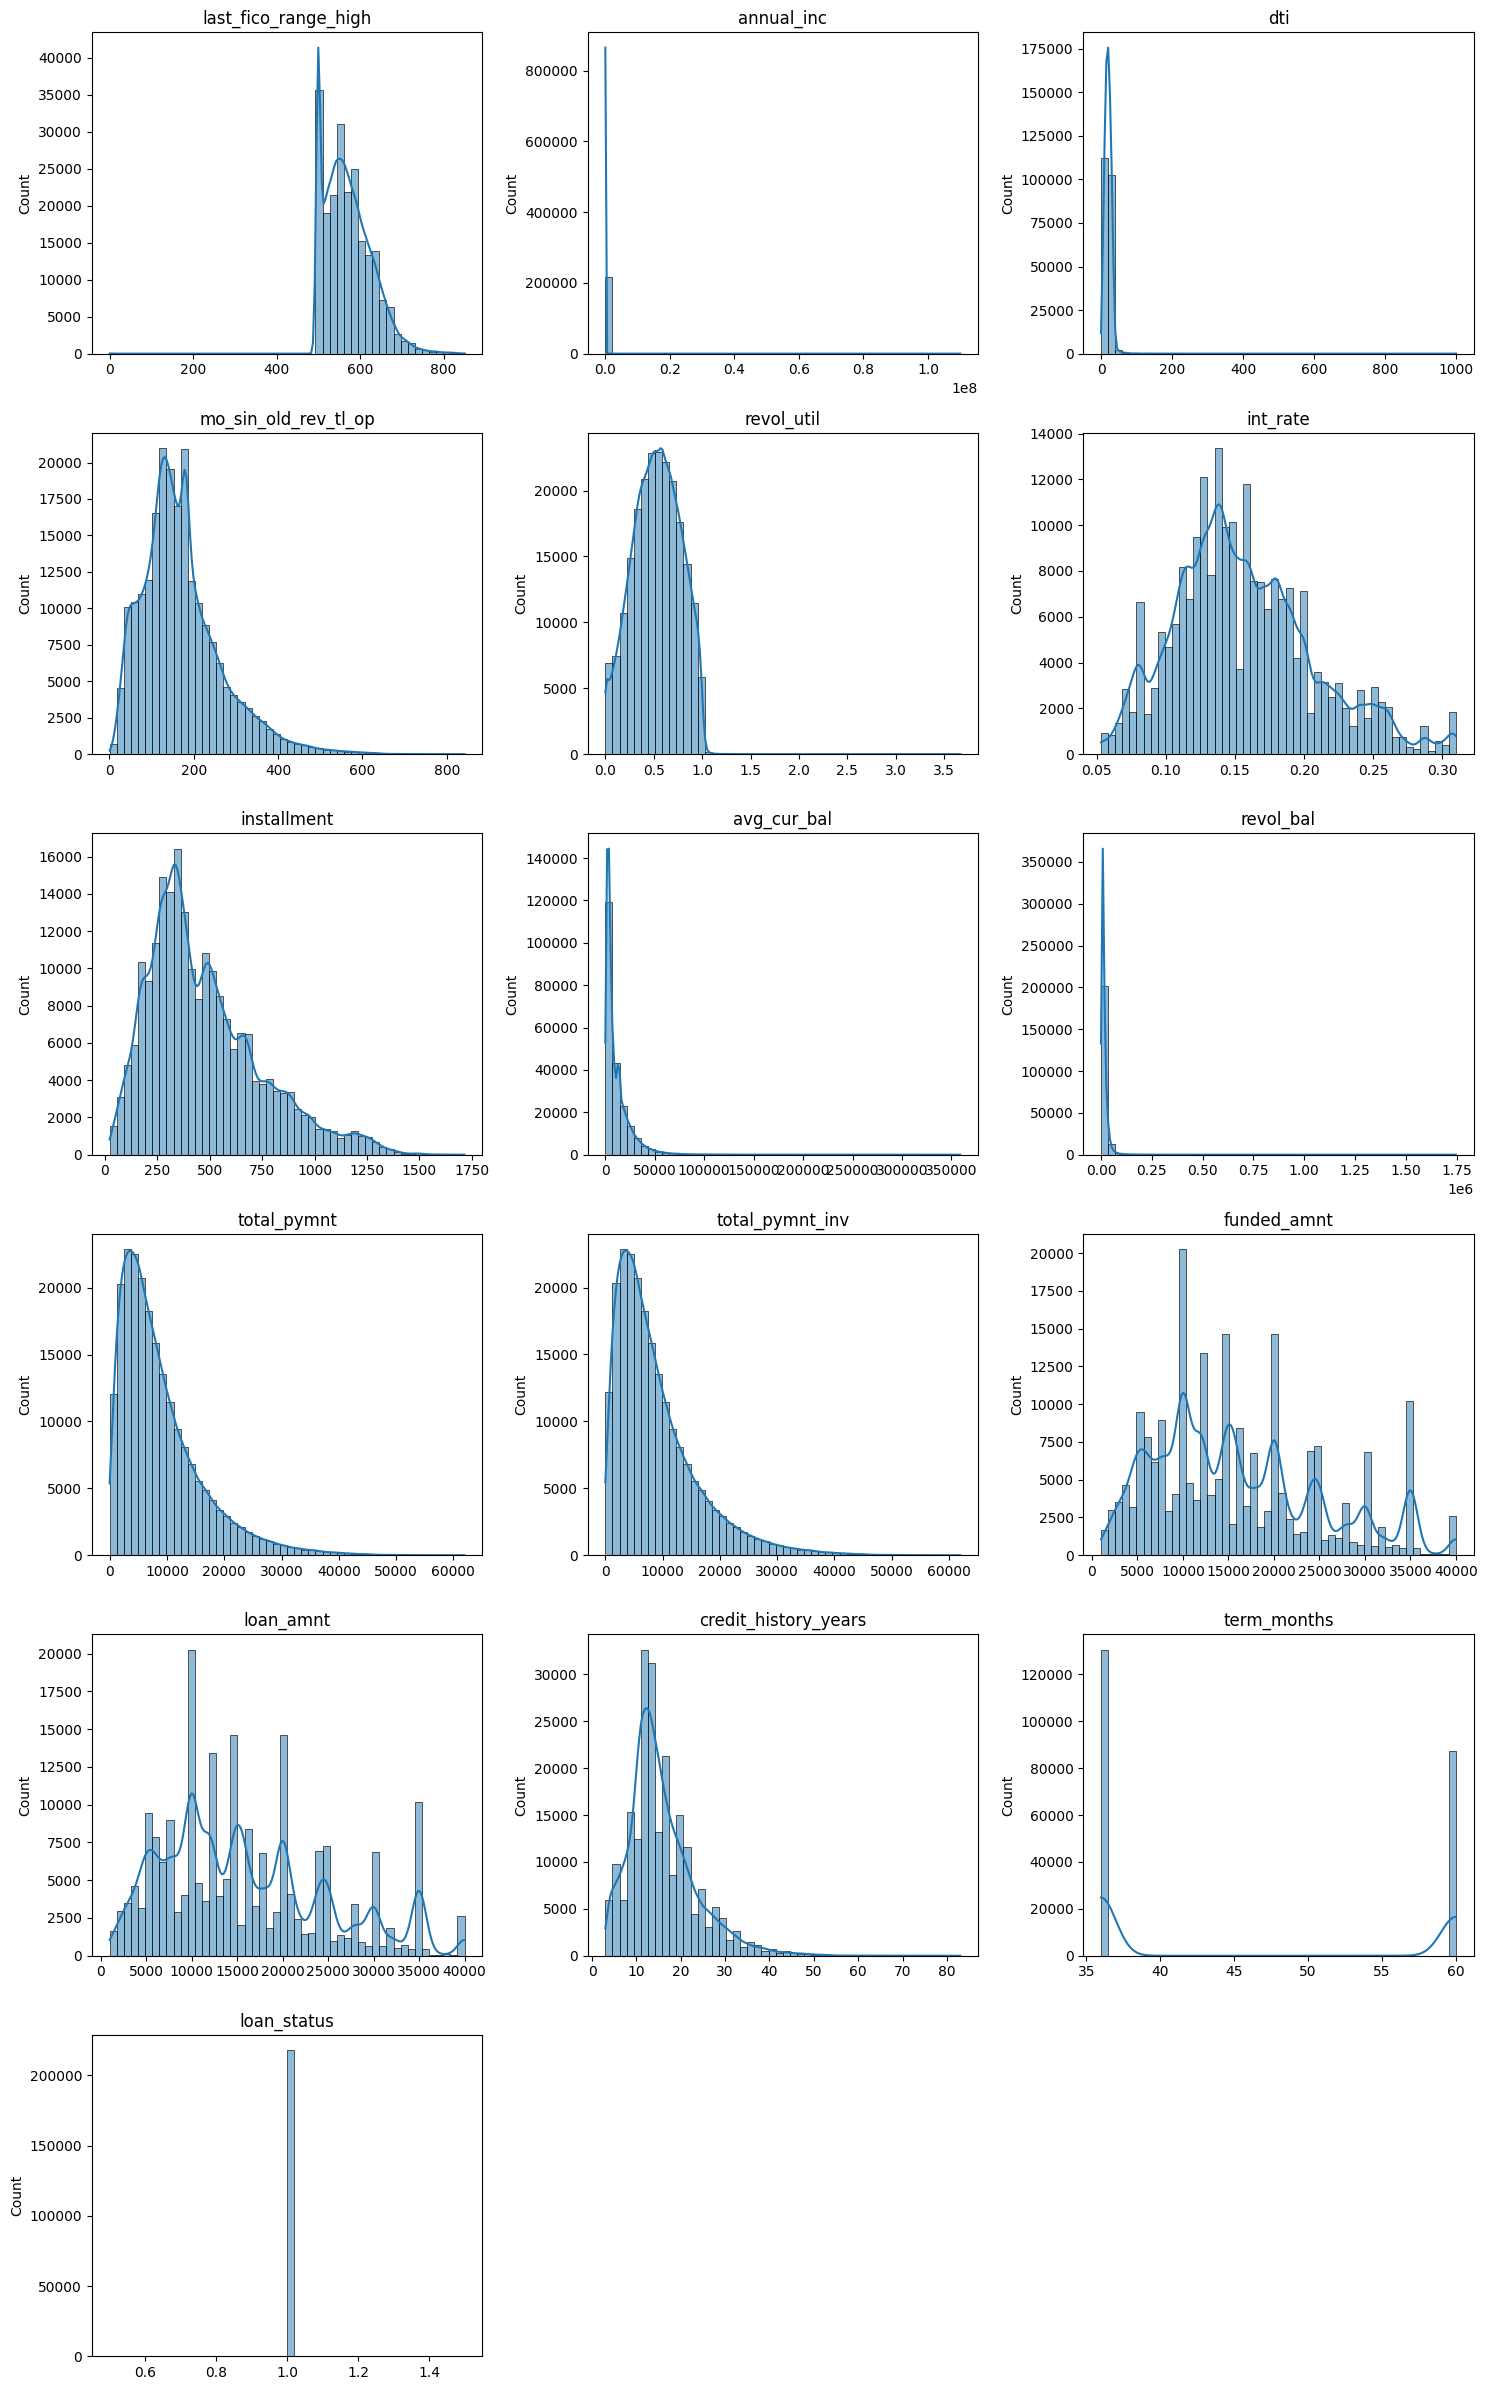

In [15]:
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot
n_cols = 3  # 한 줄에 그릴 subplot 수
n_rows = -(-len(continuous_features) // n_cols)  # 행 수 계산

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # 전체 크기 조절

for i, col in enumerate(continuous_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()
